## Pairwise Sequence Alignment of NR2F6 Protein (from Human and Mouse genomes)

In [115]:
# Import pairwise2 and format_alignment packages from Bio

In [116]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment 

In [117]:
# Assign two variables containing NR2F6 protein sequence: mus from mouse genome; homo from human genome
# Use .read() method to return the protein sequences from NCBI 

In [173]:
mus = open("/Users/ayunabudaeva/Downloads/mus.fasta").read()
homo = open("/Users/ayunabudaeva/Downloads/homo.fasta").read()

In [174]:
# Create variable "alignment" containing pairwise2.align function
# "Global alignment" will search for the best alignment between two sequences along the whole lengths of both
# Highly corresponding alignments will give a large positive score

In [175]:
alignments = pairwise2.align.globalxx(mus, homo)
print(format_alignment(*alignments[0])) 

>NP_034280----.2 nuclear receptor subfamily 2 group F member 6 [Mus --mu--sculu-----s]
MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGPA--
ACS---PPG-ATG---VEPFT--G----P--PVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||    |    ||||||||||||||||||||||||||||||||||||||||||||||||||      |   |         ||||||||||||  ||||||||||||| ||||  ||||||||||  |||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||| |  || |   ||| |     |      |    |  |||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||  |||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||  ||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| ||||||||

In [177]:
# Based on the score and overall gaps, these two protein sequences are very similar
# But let's see if we can improve the global alignment score and gaps ratio
# Introduce "for loops" to set the iterator variable to each character in each string (protein sequence)
# Identical characters will be given 1 point, non-identical characters will be penalized (-1), no penalty for gaps

In [203]:
alignments = pairwise2.align.globalmx(mus, homo, 1, -1)
print(format_alignment(*a)) 

>NP_-034--280-.2 nuclear receptor subfamily 2 group F member 6 [Mus --mu--sculu-----s]
MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGPA--
ACS---PPG-ATG---VEPFT--G----P--PVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||| |    |   ||||||||||||||||||||||||||||||||||||||||||||||||||      |   |         ||||||||||||  ||||||||||||| ||||  ||||||||||  |||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||| |  || |   ||| |     |      |    |  |||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||  |||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||  ||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| ||||||||

In [178]:
# 431.2 is a relatively high score, but let's try to find better global alignment by introducing more parameters
# Adjust existing "for loop" by adding penalty for gaps, match and mismatch will keep the same scores 
# Opening a gaps will be penalized by (-2) points, so as Extending gaps (-2)

In [145]:
for a in pairwise2.align.globalms(mus, homo, 1, -1, -2, -2): 
    print (format_alignment (*a))  

>NP_034280.2 nuclear receptor subfamily 2 group F member 6 [Mus musculus]
MAMVTGGWGDPGGDTNGVDKAGGSYPRATEDDSASPPGATSDAEPGDEERPGLQVDCVVCGDKSSGKHYG
VFTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHALPGP-A
ACS--PPG-ATG-VEP----FTGPPVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPAADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDAAEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||..|..||||||||||||||||||||||||||||||||||||||||||||||||||...........||||||||||||.||||||||||||| ||||.||||||||||.||||||||||||||||||||||||||||||..|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||. |||.|  ||| |.. |..    |.|.|||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||.|||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||.||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||||||||||||||||||||||||||||||||||||| ||
>NP_005225.2 nuclear

In [146]:
# By highly penalizing the gaps, we significantly reduced the total score, and introduced many substitutions
# Not an optimal alignment

In [ ]:
# Let's reduce gap penalties, but still keep them relatively high

In [147]:
for a in pairwise2.align.globalms(mus, homo, 1, -1, -1, -1): 
    print (format_alignment (*a))  

>NP_034280.2 nuclear receptor subfamily 2 group F member 6 [Mus mu-sculu-s]
MAMVTGGWGDPGGDTNGVDKAGGSYPRATEDDSASPPGATSDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHALPGP-A
ACS--PPG-ATG-VEP----FTGPPVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPAADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDAAEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||..|..||||||||||||||||||||||||||||||||||||||||||||||||||  ..|. |.... ||||||||||||.||||||||||||| ||||.||||||||||.|||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||. |||.|  ||| |.. |..    |.|.|||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||.|||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||.||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||||||||||||||||||||||||||||||||||||| ||
>NP_005225.2 n

In [148]:
# The total score has improved, but there are still many substitutions
# Let's reduce penalties further

In [149]:
for a in pairwise2.align.globalms(mus, homo, 1, -1, -0.5, -0.5): 
    print (format_alignment (*a))  

>NP_034280----.2 nuclear receptor subfamily 2 group F member 6 [Mus --mu--sculu-----s]
MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGPA--
ACS---PPG-ATG---VEPFT--G----P--PVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||    |    ||||||||||||||||||||||||||||||||||||||||||||||||||      |   |         ||||||||||||  ||||||||||||| ||||  ||||||||||  |||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||| |  || |   ||| |     |      |    |  |||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||  |||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||  ||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| ||||||||

In [ ]:
# The total score has improved, and the substitutions have been taken care of 

In [179]:
# Let's keep reducing gap penalties

In [180]:
for a in pairwise2.align.globalms(mus, homo, 1, -1, -0.5, -0.3): 
    print (format_alignment (*a)) 

>NP_034280----.2 nuclear receptor subfamily 2 group F member 6 [Mus---- musculu-----s]
MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGP--A
AC---SPPG----ATGVEP------FTGP--PVSELIAQLLRAEPYPAA-GRFG-GG---GAVLGIDNVCELAARLL-FSTVEWARHAPFF
PELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||    |    ||||||||||||||||||||||||||||||||||||||||||||||||||       |  |         ||||||||||||  ||||||||||||| ||||  ||||||||||  |||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  |||   |||    ||||    |  |        |  |  |||||||||||||||||| |||| ||   ||||||||||||||||| ||||||||||||| ||||  |||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||  ||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| ||||||||

In [181]:
for a in pairwise2.align.globalms(mus, homo, 1, -1, -0.3, -0.3): 
    print (format_alignment (*a)) 

>NP_034280----.2 nuclear receptor subfamily 2 group F member 6 [Mus --mu--sculu-----s]
MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGPA--
ACS---PPG-ATG---VEPFT--G----P--PVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||    |    ||||||||||||||||||||||||||||||||||||||||||||||||||      |   |         ||||||||||||  ||||||||||||| ||||  ||||||||||  |||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||| |  || |   ||| |     |      |    |  |||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||  |||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||  ||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| ||||||||

In [182]:
# This alignment looks much better - good score, a few gaps, no substitutions 
# Now, out of curiousity, let's push the penalties to the minimum

In [183]:
for a in pairwise2.align.globalms(mus, homo, 1, -1, -0.1, -0.1): 
    print (format_alignment (*a)) 

>NP_034280----.2 nuclear receptor subfamily 2 group F member 6 [Mus --mu--sculu-----s]
MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYG
V-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGPA--
ACS---PPG-ATG---VEPFT--G----P--PVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFF
PELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLG
RLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAV
PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


|||||    |    ||||||||||||||||||||||||||||||||||||||||||||||||||      |   |         ||||||||||||  ||||||||||||| ||||  ||||||||||  |||||||||||||||||||||||||||||| | |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||| |  || |   ||| |     |      |    |  |||||||||||||||||| |||| ||||   ||||||||||||||| ||||||||||||| ||||  |||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| |||||  ||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||| ||||||||

In [184]:
# Gaps are almost identical to the first global alignment (1,-1), but the score is lower
# The ideal global alignment is the the first one, where Identical characters are worth 1 point, no penalties

# Dot Plot to Visualize the Best Pairwise Alignment

In [185]:
# Import SeqIO function from Bio library to enable access to our protein sequences 
# Import matplotlib to enable mathimatical operations on the sequences (ex. base pair count) as well as plot function

In [186]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [211]:
# A single .fasta file has been created. 
# The New.fasta file contains the best alignment of NR2F6 protein sequences from mouse and human genomes

In [ ]:
# Parse mouse sequence first, using Seq.IO.parse() function. Assign variable "mus"
# Print it to see if it works 

In [204]:
Fasta = list(SeqIO.parse("/Users/ayunabudaeva/Downloads/New.fasta", "fasta"))
mus = Fasta[0].seq
print(mus)

MAMVTGGWGD-PGGDTNGVDKAGGSYPRAT-EDDSASPPGAT-SDAEPGDEERPGLQVDCVVCGDKSSGKHYGV-FTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPHA-LPGPA--ACS---PPG-ATG---VEPFT--G----P--PVSELIAQLLRAEPYPAA-GRFG-GGGA---VLGIDNVCELAARLL-FSTVEWARHAPFFPELPA-ADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMD-QVRAFQEQVDKLGRLQVDA-AEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRF-GRLLLRLPALRAVPASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSG-


In [212]:
# Parse human (homo) sequence. Assign variable "homo" 
# Print to see if it works

In [213]:
homo = Fasta[1].seq
print(homo)

MAMVTGGWG-GPGGDTNGVDKAGG-YPRA-AEDDSASPPGA-ASDAEPGDEERPGLQVDCVVCGDKSSGKHYG-VFTCEGCKSFFKRSIRRNLSYTCRSNRDCQIDQHHRNQCQYCRLKKCFRVGMRKEAVQRGRIPH-SLPG-AVAA-SSGSPPGSA--LAAV----ASGGDLFPGQPVSELIAQLLRAEPYPAAAGRFGAGGGAAGAVLGIDNVCELAARLLFSTVEWARHAPFF-PELP-VADQVALLRLSWSELFVLNAAQAALPLHTAPLLAAAGLHAAPMAAERAVAFMDQVRAFQEQVDKLG-RLQVD-SAEYGCLKAIALFTPDACGLSDPAHVESLQEKAQVALTEYVRAQYPSQPQRFGRLLLRLPALRAV-PASLISQLFFMRLVGKTPIETLIRDMLLSGSTFNWPYGSGQScore=431.2


In [207]:
# Now it's time to ajust the dot plot:
# x axis represents NR2F6 protein sequence from mouse genome
# y axis represents NR2F6 protein sequence from human genome
# window size is 3 to tone down the noise

In [208]:
window = 3
x = str(mus)
y = str(homo)

In [ ]:
# Assign veriable "data"
# Use "for loop" function to iterate data

In [214]:
data = [[(mus[i : i + window] != homo[j: j + window])
        for j in range(len(mus) - window)]
    for i in range(len(homo) - window)]

In [245]:
# Use plt.imshow to put data into a plot
# Label the x, y axes 
# Title the Plot
# Use show function to display the plot

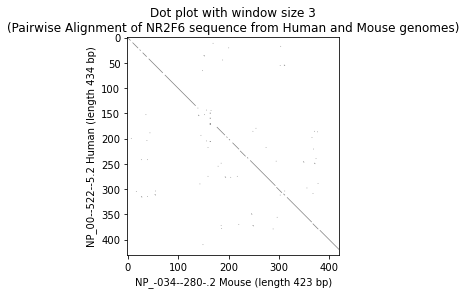

In [244]:
plt.imshow(data)
plt.xlabel("%s Mouse (length %i bp)" % (Fasta[0].id, len(Fasta[0].seq)))
plt.ylabel("%s Human (length %i bp)" % (Fasta[1].id, len(Fasta[1].seq)))
plt.title("Dot plot with window size %i\n(Pairwise Alignment of NR2F6 sequence from Human and Mouse genomes)" % window)
plt.show()